# Example implementation of a subgraph enumeration algorithm and motif-counting in R

Load the packages that we will need for this exercise, and also set the random number seed

In [31]:
suppressPackageStartupMessages(library(igraph))
library(plyr)

Set the random number seed to ``1337``:

In [30]:
set.seed(1337)

Write a recursive function ``extend_seqs_by_one_recurser`` that will take an undirected ``igraph::Graph`` object and a list of vertex sequences (each vertex sequence of length ``k' <= max_k``) and make a new, larger list of sequences (each of length ``k' + 1``), each consisting of a one-vertex extension to the subgraph corresponding to the length ``k'`` sequence.

In [2]:
extend_seqs_by_one_recurser <- function(mygraph, myseqs, k) {
    if (k > 1) {
        unique(unlist(unlist(lapply(extend_seqs_by_one_recurser(mygraph, myseqs, k-1),
                                    function(myseq) {
                                        lapply(myseq, function(myvertex) {
                                            lapply(setdiff(neighbors(mygraph, myvertex), myseq),
                                                   function(myneighbor) {
                                                       sort(c(myseq, myneighbor))
                                                   })                                            
                                        })
                                    }),
                             recursive=FALSE),
                      recursive=FALSE))
    } else {
        myseqs
    }
}

Write a function ``key_motifs`` that will take a directed ``igraph::Graph`` object ``mydigraph`` and a list ``myseqs`` of subgraphs described by vertex sequences, and computes in and out degree of each of the vertices in each of the subgraphs:

In [ ]:
key_motifs <- function(mydigraph, myseqs) {
    lapply(myseqs, function(myseq) {
        outdeg_myseq <- sort(sapply(myseq, function(myvert) {sum(mydigraph[myvert, setdiff(myseq, myvert)])}))
        indeg_myseq <- sort(sapply(myseq, function(myvert) {sum(mydigraph[setdiff(myseq, myvert), myvert])}))
        c(indeg_myseq, outdeg_myseq)
    })
}

In [33]:
nvertices <- 6
medges_step <- 3
G = sample_pa(n=nvertices, m=medges_step)
summary(G)

IGRAPH a0767d9 D--- 6 12 -- Barabasi graph
+ attr: name (g/c), power (g/n), m (g/n), zero.appeal (g/n), algorithm
| (g/c)


Plot the graph that you created

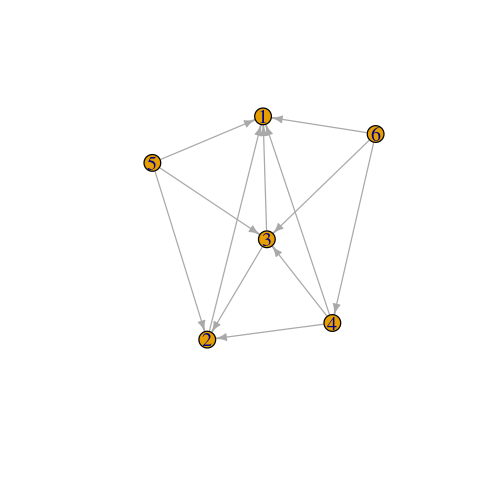

In [14]:
plot(G)

Run the function ``extend_seqs_by_one_recurser`` on the undirected version of ``G``, with ``k=3``. Take a look at the results:

In [15]:
subgraphs <- extend_seqs_by_one_recurser(as.undirected(G), 1:nvertices, 3)
subgraphs

[[1]]
[1] 1 2 3

[[2]]
[1] 1 2 4

[[3]]
[1] 1 2 5

[[4]]
[1] 1 2 6

[[5]]
[1] 1 3 4

[[6]]
[1] 1 3 5

[[7]]
[1] 1 3 6

[[8]]
[1] 1 4 5

[[9]]
[1] 1 4 6

[[10]]
[1] 1 5 6

[[11]]
[1] 2 3 4

[[12]]
[1] 2 3 5

[[13]]
[1] 2 3 6

[[14]]
[1] 2 4 5

[[15]]
[1] 2 4 6

[[16]]
[1] 3 4 5

[[17]]
[1] 3 4 6

[[18]]
[1] 3 5 6

Call ``key_motifs`` on the directed graph ``G`` and the subgraph vertex sequences ``subgraphs``, which will return a list of lists.  Stack the lists into a matrix using ``do.call`` and ``rbind``.  Take a look at your matrix:

In [29]:
list_of_lists <- key_motifs(G, extend_seqs_by_one_recurser(as.undirected(G), 1:nvertices, 3))
subgraph_degree_counts <- do.call(rbind, list_of_lists)
subgraph_degree_counts

0,1,2,0,1,2
0,1,2,0,1,2
0,1,2,0,1,2
0,0,2,0,1,1
0,1,2,0,1,2
0,1,2,0,1,2
0,1,2,0,1,2
0,0,2,0,1,1
0,1,2,0,1,2
0,0,2,0,1,1
0,1,2,0,1,2


Make a ``data.frame`` out of the ``subgraph_degree_counts`` matrix and tabulate the number of times each unique row appears, using ``plyr::count``:

In [20]:
plyr::count(data.frame(subgraph_degree_counts))

X1,X2,X3,X4,X5,X6,freq
0,0,2,0,1,1,6
0,1,1,0,1,1,2
0,1,2,0,1,2,10


Compare to the counts from calling ``igraph::motifs`` on ``G``, with the default ``k=3``:

In [21]:
motifs(G)

[1] NA NA  6 NA  2  0  0 10  0  0  0  0  0  0  0  0

Now let's do a **four-vertex motif**count on the same graph, by nesting the various function calls that we used for the subgraph motif analysis with ``k=3`` above:

In [22]:
plyr::count(data.frame(do.call(rbind, key_motifs(G, extend_seqs_by_one_recurser(as.undirected(G), 1:nvertices, 4)))))

X1,X2,X3,X4,X5,X6,X7,X8,freq
0,0,1,2,0,1,1,1,1
0,0,1,3,0,1,1,2,3
0,0,2,2,0,1,1,2,1
0,0,2,3,0,1,2,2,4
0,1,1,3,0,1,2,2,2
0,1,2,2,0,1,2,2,1
0,1,2,3,0,1,2,3,3


Let's compare to what we get when we call ``igraph::motifs`` on ``G``, using ``k=4`` (omit all ``NA`` values and ``0`` counts, and display only the nonzero counts returned). You may find it helpful to use the function ``na.omit``:

In [24]:
counts <- na.omit(motifs(G,4))
counts[counts > 0]

[1] 1 3 1 4 2 1 3

Did the R code correctly calculate the subgraph motif counts?